
### Housing Price Prediction using Multiple Linear Regression

This project predicts housing prices using multiple linear regression based on features like quality, area, and garage details.

In [201]:
# imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# load dataset

df = pd.read_csv('housing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [203]:
#handle null values
df = df.fillna(0)

#more features for better r2 score
X = df[['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'TotRms AbvGrd', 'Bedroom AbvGr', 'Garage Area', '1st Flr SF', 'Total Bsmt SF', 'Year Built', 'Garage Yr Blt', 'Fireplaces']]
y = df['SalePrice']

##### training the data

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [205]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [206]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [207]:
# predict on data set

y_pred = lr.predict(X_test)

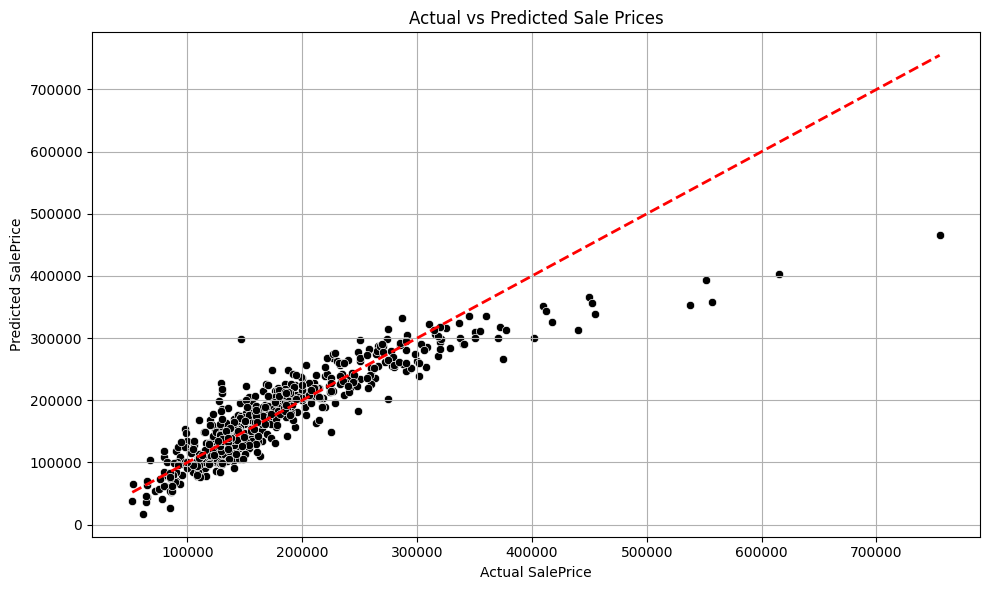

In [209]:
# Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [208]:
from sklearn.metrics import r2_score

print("r2 score: ",r2_score(y_test, y_pred)) #81% accuracy 
print("intercept:", lr.intercept_)
print("coefficients:", lr.coef_)

r2 score:  0.8107040641850802
intercept: -693522.8061518002
coefficients: [ 2.00965141e+04  4.58382164e+01  7.11996771e+03  1.64105672e+03
 -7.59065509e+03  4.15270840e+01  7.24822516e+00  2.01643503e+01
  3.27841424e+02 -1.09454502e+01  1.00703344e+04]


###  Conclusion

- The model achieved an R² score of **0.81**, meaning it explains 81% of the variation in house prices using the selected features.
- The plot shows that most predicted values are close to actual prices, with a few deviations.
- Features like `Overall Qual`, `Gr Liv Area`, and `Garage Cars` have strong influence on pricing.
- This project successfully demonstrates a full linear regression pipeline on a real-world dataset, including preprocessing, training, evaluation, and visualization.